# Light Gradient Boosting

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%cd ..
%cd ..

from accel.read_data import prep_data, get_numeric_cols, get_object_cols
from accel.constants import DATA_DIR
from accel.training import model_tune, score

from lightgbm import LGBMRegressor

# For reproducibility
np.random.seed(42)

/cdthome/xqe353/Custom Encodings
/cdthome/xqe353


## Data prep
Use the unnormalised data without doing one-hot encoding.

In [2]:
# Path to dataset
PATH = '/cdtshared/wearables/students/group5/'

# Features from biobank
X_train = pd.read_pickle(PATH+"XtrainPCAELLIE.pkl")
X_val = pd.read_pickle(PATH+"XvalPCAELLIE.pkl")
X_test = pd.read_pickle(PATH+"XtestPCAELLIE.pkl")
# Outcome
y_train = pd.read_pickle(PATH+"ytrainPCAELLIE.pkl")
y_val = pd.read_pickle(PATH+"yvalPCAELLIE.pkl")
y_test = pd.read_pickle(PATH+"ytestPCAELLIE.pkl")

# Hyper-parameter tuning
We perform hyper-parameter tuning since it is less time-consuming to fit

In [4]:
# define lists of params interested in

max_depth = np.arange(2,30) # max depth of base learners
learning_rate = np.geomspace(1e-2,1) # learning rate
n_estimators = np.arange(50,1000,100) # how many trees
reg_alpha = np.geomspace(1e-5,1) # how much l1 regularisation
reg_lambda = np.geomspace(1e-5,1) # how much l2 regularisation
  
params = {
    "max_depth" : max_depth,
    "learning_rate" : learning_rate,
    "n_estimators" : n_estimators,
    "reg_alpha" : reg_alpha,
    "reg_lambda" : reg_lambda
}

In [5]:
model_tune(LGBMRegressor(random_state=42), 
           params, 
           X_train, y_train, 
           X_val, y_val,
           100)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 f

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 f

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 1 folds for each of 1 candidates, totalling 1 f

BayesSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
              estimator=LGBMRegressor(random_state=42), n_iter=100, refit=False,
              search_spaces={'learning_rate': array([0.01      , 0.01098541, 0.01206793, 0.01325711, 0.01456348,
       0.01599859, 0.01757511, 0.01930698, 0.02120951, 0.02329952,
       0.02559548, 0.02811769, 0.03088844, 0.03393222, 0.03727594,
       0.04094915, 0.04498433,...
       2.81176870e-03, 3.55648031e-03, 4.49843267e-03, 5.68986603e-03,
       7.19685673e-03, 9.10298178e-03, 1.15139540e-02, 1.45634848e-02,
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00])},
              verbose=1)

In [6]:
clf = LGBMRegressor(learning_rate = 0.019306977288832496, 
                    max_depth=14, 
                    n_estimators=750,
                    reg_alpha = 0.037275937203149416,
                    reg_lambda = 0.00042919342601287783,
                    random_state=42).fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


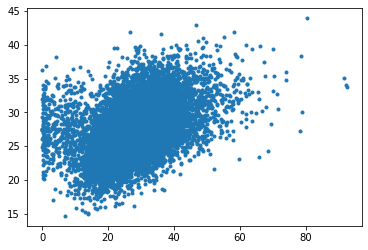

In [7]:
y_pred = clf.predict(X_val)
plt.plot(y_val,y_pred, ".")

In [8]:
score(y_val, y_pred)

MSE is:  69.66710713298583
R2 is:  0.17281001932635076
Explained variance is: 0.1729149356638504


(<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.explained_variance_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MSE is:  71.76963497745747
R2 is:  0.16456310124452833
Explained variance is: 0.16457674930765565


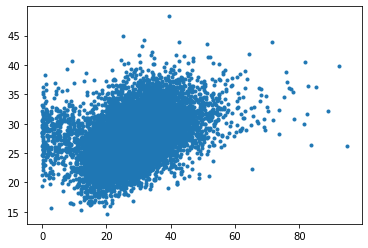

In [9]:
X = np.vstack((X_train, X_val))
y = np.concatenate([y_train, y_val])

clf = LGBMRegressor(learning_rate = 0.019306977288832496, 
                    max_depth=14, 
                    n_estimators=750,
                    reg_alpha = 0.037275937203149416,
                    reg_lambda = 0.00042919342601287783,
                    random_state=42).fit(X, y)

y_pred = clf.predict(X_test)
plt.plot(y_test,y_pred, ".")
_ = score(y_test, y_pred)